## 1. Подготовка признаков

In [2]:
import pandas as pd
df = pd.read_csv(r'E:\COURSES\Кодинг\[Yandex praxis]. DS specialist + (2022)\6\Часть 6\04 Несбалансированная классификация\travel_insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\COURSES\\Кодинг\\[Yandex praxis]. DS specialist + (2022)\\6\\Часть 6\\04 Несбалансированная классификация\\travel_insurance.csv'

In [2]:
df.head(2)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commission (in value),Gender,Age
0,JZI,Airlines,Online,Value Plan,0,12,"TAIWAN, PROVINCE OF CHINA",45.0,15.75,M,39
1,EPX,Travel Agency,Online,Cancellation Plan,0,50,JAPAN,22.0,0.00,NaN,36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 50660 non-null  object 
 1   Agency Type            50660 non-null  object 
 2   Distribution Channel   50660 non-null  object 
 3   Product Name           50660 non-null  object 
 4   Claim                  50660 non-null  int64  
 5   Duration               50660 non-null  int64  
 6   Destination            50660 non-null  object 
 7   Net Sales              50660 non-null  float64
 8   Commission (in value)  50660 non-null  float64
 9   Gender                 14569 non-null  object 
 10  Age                    50660 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.3+ MB


In [4]:
df.Gender.value_counts()

Gender
M    7496
F    7073
Name: count, dtype: int64

Для анализа лучше перевести гендер в 1 и 0 для мужчины и женщины. Этого можно добиться разными способами.

### 1.1. OHE (One-Hot Encoding)

Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).

Для каждого значения признака Gender (F, M, None) создаётся столбец:
Gender_F (от англ. female, «женщина»),
Gender_M (от англ. male, «мужчина»),
Gender_None (данных о поле нет).
Когда ставить единицу в добавленные столбцы, зависит от того, каково значение Gender. Например, если F, то 1 записывается в столбец Gender_F, а M — в `Gender_M`.

Когда ставить единицу в добавленные столбцы, зависит от того, каково значение Gender. Например, если F, то 1 записывается в столбец Gender_F, а M — в `Gender_M`.


Резюмируем. Техникой OHE категориальные признаки переводятся в численные в два этапа:
Для каждого значения признака создаётся новый столбец;
Если объекту категория подходит, присваивается 1, если нет — 0.
Новые признаки (`Gender_F`, `Gender_M`, `Gender_None`) называются дамми-переменными, или дамми-признаками (англ. dummy variable, «фиктивная переменная»).

Для прямого кодирования в библиотеке pandas есть функция `pd.get_dummies()` (от англ. «получить фиктивные переменные»)


In [5]:
data_ohe = pd.get_dummies(df, columns=['Gender'], dummy_na=True, drop_first=True, dtype=int)
print(data_ohe.head(5))

  Agency    Agency Type Distribution Channel       Product Name  Claim  \
0    JZI       Airlines               Online         Value Plan      0   
1    EPX  Travel Agency               Online  Cancellation Plan      0   
2    EPX  Travel Agency               Online  Cancellation Plan      0   
3    EPX  Travel Agency               Online  Cancellation Plan      0   
4    JZI       Airlines               Online         Value Plan      0   

   Duration                Destination  Net Sales  Commission (in value)  Age  \
0        12  TAIWAN, PROVINCE OF CHINA       45.0                  15.75   39   
1        50                      JAPAN       22.0                   0.00   36   
2       251                     BRAZIL       80.0                   0.00   36   
3         6                      INDIA      -10.0                   0.00   36   
4         5                      CHINA       45.0                  15.75   34   

   Gender_M  Gender_nan  
0         1           0  
1         0     

In [6]:
print(data_ohe.Gender_M.shape[0] - data_ohe.Gender_M.sum()-data_ohe.Gender_nan.sum())

7073


### 1.2. Ordinal Encoder

Чтобы закодировать цифрами выраженные в тексте категории — Ordinal Encoding (от англ. «кодирование по номеру категории»). Она работает так:
Фиксируется, какой цифрой кодируется класс;
Цифры размещаются в столбце.

`from sklearn.preprocessing import OrdinalEncoder`

Чтобы получить список категориальных признаков, вызываем метод `fit()` — как и в обучении модели. Передаём ему данные как аргумент.

Преобразуем данные функцией `transform()` (англ. «преобразовать»). Изменённые данные будут храниться в переменной data_ordinal (англ. «порядковые данные»).

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(df), columns = df.columns)

In [8]:
data_ordinal.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commission (in value),Gender,Age
0,9.0,0.0,1.0,24.0,0.0,14.0,121.0,602.0,486.0,1.0,37.0
1,7.0,1.0,1.0,10.0,0.0,52.0,61.0,470.0,0.0,NaN,34.0
2,7.0,1.0,1.0,10.0,0.0,253.0,16.0,735.0,0.0,NaN,34.0
3,7.0,1.0,1.0,10.0,0.0,8.0,54.0,121.0,0.0,NaN,34.0
4,9.0,0.0,1.0,24.0,0.0,7.0,24.0,602.0,486.0,1.0,32.0


In [9]:
data_ordinal['Gender'].value_counts()

# 1 - Male, 0 - Female

Gender
1.0    7496
0.0    7073
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(data_ordinal, test_size=0.25, random_state=12345)
features_train = df_train.drop('Claim', axis=1)
target_train = df_train['Claim']
features_valid = df_valid.drop('Claim', axis=1)
target_valid = df_valid['Claim']

print(features_train.shape)
print(features_valid.shape)
print(features_train.head(2))

(37995, 10)
(12665, 10)
       Agency  Agency Type  Distribution Channel  Product Name  Duration  \
33312     7.0          1.0                   1.0          10.0      79.0   
50154     7.0          1.0                   1.0          10.0      22.0   

       Destination  Net Sales  Commission (in value)  Gender   Age  
33312         24.0      414.0                    0.0     NaN  34.0  
50154        113.0      398.0                    0.0     NaN  34.0  


In [11]:
from sklearn.tree import DecisionTreeClassifier

best_result_decision_tree = 0
best_model_decision_tree = None
best_depth_decision_tree = None

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=333, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = model.score(features_valid, target_valid)
    if result > best_result_decision_tree:
        best_model_decision_tree = model
        best_result_decision_tree = result
        best_depth_decision_tree = depth
print('The best decision tree depth', best_depth_decision_tree,
      'The best score is:', best_result_decision_tree)

The best decision tree depth 1 The best score is: 0.9866561389656534


`Ordinal Encoding` doesn't fit for `Logistic Regression`

Если все признаки должны стать количественными, подходит техника OHE;
Когда все признаки категориальные, и их нужно преобразовать в числа — Ordinal Encoding.

## 2. Data standardization

В данных есть столбцы: `Age` и `Commission`. Допустим, возможен возраст от 0 до 100 лет, а страховая комиссия — от 100 долларов до 1000. Значения и их разбросы в столбце `Commission` больше, поэтому алгоритм автоматически решит, что этот признак важнее возраста. А это не так: все признаки значимы.

Чтобы избежать этой ловушки, признаки масштабируют — приводят к одному масштабу.
Один из методов масштабирования — стандартизация данных.

Предположим, что все признаки распределены нормально, среднее (англ. mean, M) и дисперсия (лат. dispersio, D) определяются по выборке. Значения признака преобразуются по формуле:
$$
New\ value = \frac{Old\ value - M}{\sqrt{D}}
$$

В `sklearn` есть отдельная структура для стандартизации данных — `StandardScaler` (от англ. «преобразователь масштаба методом стандартизации»). Он находится в модуле `sklearn.preprocessing`.
Импортируем `StandardScaler` из библиотеки:

from `sklearn.preprocessing` import `StandardScaler`

`scaler = StandardScaler()`

`scaler.fit(features_train)` 

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric = ['Duration', 'Net Sales', 'Commission (in value)', 'Age']

features_train[numeric] = (pd.DataFrame(
    scaler
    .fit_transform(features_train[numeric]),
    columns = numeric)
              )
features_train.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission (in value),Gender,Age
33312,7.0,1.0,1.0,10.0,0.193861,24.0,-2.325353,1.103670,NaN,1.565044
50154,7.0,1.0,1.0,10.0,NaN,113.0,NaN,NaN,NaN,NaN
26729,7.0,1.0,1.0,10.0,-0.607112,76.0,-0.177956,1.013577,NaN,-0.214134
37842,7.0,1.0,1.0,1.0,-0.378262,124.0,-0.347180,-0.770269,NaN,-0.298857
23588,7.0,1.0,1.0,1.0,-0.063594,76.0,-0.732311,-0.770269,NaN,-0.298857


In [61]:
from sklearn.tree import DecisionTreeClassifier

best_result_decision_tree = 0
best_model_decision_tree = None
best_depth_decision_tree = None
best_prediction_dt = None

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=333, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_dt = model.predict(features_valid)
    result = model.score(features_valid, target_valid)
    if result > best_result_decision_tree:
        best_model_decision_tree = model
        best_result_decision_tree = result
        best_depth_decision_tree = depth
        best_prediction_dt = predictions_dt
print('The best decision tree depth', best_depth_decision_tree,
      'The best score is:', best_result_decision_tree)

The best decision tree depth 5 The best score is: 0.9867350967232531


## 3. Проверка адекватности модели

Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс `«1»` или `«0»`. Количество уникальных значений подсчитывается методом `value_counts()`. Он группирует строго одинаковые величины.

Claim
0    0.985136
1    0.014864
Name: proportion, dtype: float64


<Axes: xlabel='Claim'>

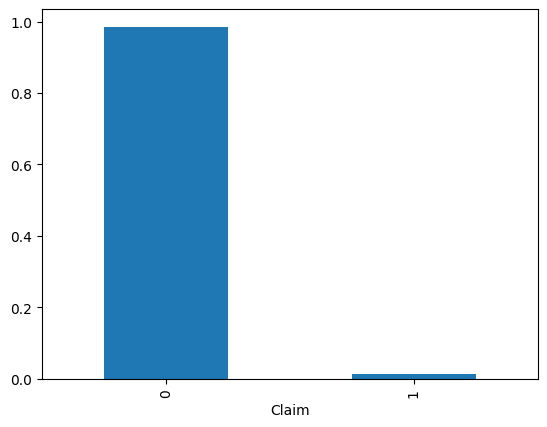

In [14]:
class_frequency_original = df['Claim'].value_counts(normalize=True)
print(class_frequency_original)
class_frequency_original.plot(kind='bar') 

0.0    0.941098
1.0    0.058902
Name: proportion, dtype: float64


<Axes: >

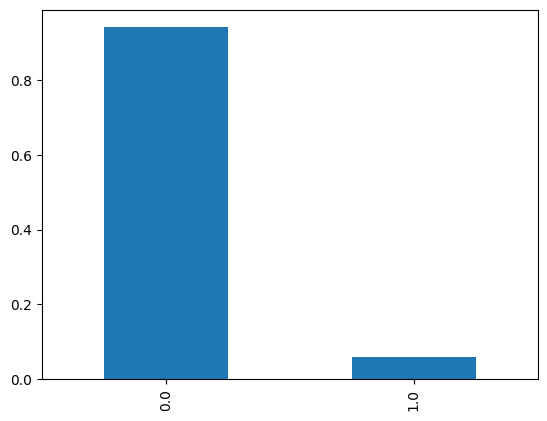

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

predicted_valid = pd.Series(model.predict(features_valid))

class_frequency_model = predicted_valid.value_counts(normalize=True)
print(class_frequency_model)
class_frequency_model.plot(kind='bar') 

Создайте константную модель: любому объекту она прогнозирует класс `«0»`. Сохраните её предсказания в переменной `target_pred_constant`.
Напечатайте на экране значение `accuracy`.

In [24]:
target_pred_constant = pd.Series([0]*len(target_valid))
print(accuracy_score(target_valid, target_pred_constant))
print(f'Accuracy difference between the best decision tree result and Series full of [0] is {best_result_decision_tree-accuracy_score(target_valid, target_pred_constant)}')

0.9866561389656534
Accuracy difference between the best decision tree result and Series full of [0] is 7.895775759969581e-05


Модель не проходит проверку на адекватность, так как `accuracy_score` у модели эквивалентна константному значению

### 4. Confusion matrix

Вам нужно составить условия на последовательности: объединить их логическим оператором и найти сумму значений. Как вы знаете, оператор and в Pandas записывается символом &:

Справиться с дисбалансом и более точно классифицировать ответы помогут новые метрики.
Что значит истинно положительный ответ (TP)? Модель пометила объект единицей, и его настоящее значение тоже — 1.

В нашей задаче истинно положительный ответ — это количество застрахованных, которые:
* по прогнозу модели обратились за компенсацией;
* фактически запросили страховую выплату.

In [39]:
import pandas as pd
target = pd.Series([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])
predictions = pd.Series([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

#True positive - Model predicted 1 and it's 1.
tp = ((target==1) & (predictions==1)).sum()
print(tp.sum())

#False positive - Model predicted 1 but it's 0.
fp = ((target==0) & (predictions==1)).sum()
print(fp.sum())

#True negative - Model predicted 0 and it's 0.
tn = ((target==0) & (predictions==0)).sum()
print(tn.sum())

#False negative - Model predicted 0 but it's 1.
fn = ((target==1) & (predictions==0)).sum()
print(fn.sum())

5
3
4
2


Compute confusion matrix to evaluate the accuracy of a classification.

`sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None`

\begin{array}{c|c|c}
\text{Actual/Predicted} & \text{Positive (1)} & \text{Negative (0)} \\
\hline
\text{Positive (1)} & \text{TN (True Negative)} & \text{FP (False Positive)} \\
\text{Negative (0)} & \text{FN (False Negative)} & \text{TP (True Positive)} \\
\end{array}

In [53]:
from sklearn.metrics import confusion_matrix 
pd.DataFrame(confusion_matrix(target, predictions)) 

,0,1
0,4,3
1,2,5


Let's get back to the decision tree model and evaluate `confusion_matrix` on it

In [62]:
pd.DataFrame(confusion_matrix(target_valid,best_prediction_dt)) 

,0,1
0,12496,0
1,168,1


### 5. Recall

Полнота выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит.
$$
Recall = \frac{TP }{TP + FN}
$$

`sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')`

Parameters:

* `labels`: array-like, default=`None`. The set of labels to include when average != `'binary'`, and their order if average is `None`.

* `pos_labelint`, float, bool or str, default=1. The class to report if average='binary' and the data is binary, otherwise this parameter is ignored.
* `average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}` or `None`, default=`binary`

Полнота должна стремиться к `1`

In [76]:
from sklearn.metrics import recall_score
recall_score = recall_score(target_valid, best_prediction_dt)
print(recall_score)

0.005917159763313609


### 6. Precision
Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность.

$$
Precision = \frac{TP }{TP + FP}
$$

`precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')`

In [77]:
from sklearn.metrics import precision_score
precision_score = precision_score(target_valid, best_prediction_dt)
print(precision_score)

1.0


### 7. F1-мера
По отдельности полнота и точность не слишком информативны. Нужно одновременно повышать показатели обеих. Или обратиться к новой метрике, которая их объединит.

Полнота и точность оценивают качество прогноза положительного класса с разных позиций. `Recall` описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. `Precision` выявляет, не переусердствует ли модель, присваивая положительные метки.

Важны обе метрики. Контролировать их параллельно помогают агрегирующие метрики, одна из которых — `F1-мера` (англ. `F1-score`). Это среднее гармоническое полноты и точности. Единица в `F1` означает, что соотношение полноты и точности равно 1:1.

$$
F1 = \frac{2 * Precision * Recall}{Precision + Recall}
$$

`sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')`

C:\Users\stazher3\AppData\Local\Temp\ipykernel_19164\2675527397.py:10: RuntimeWarning: invalid value encountered in divide
  F1 = 2 * (P * R) / (P + R)


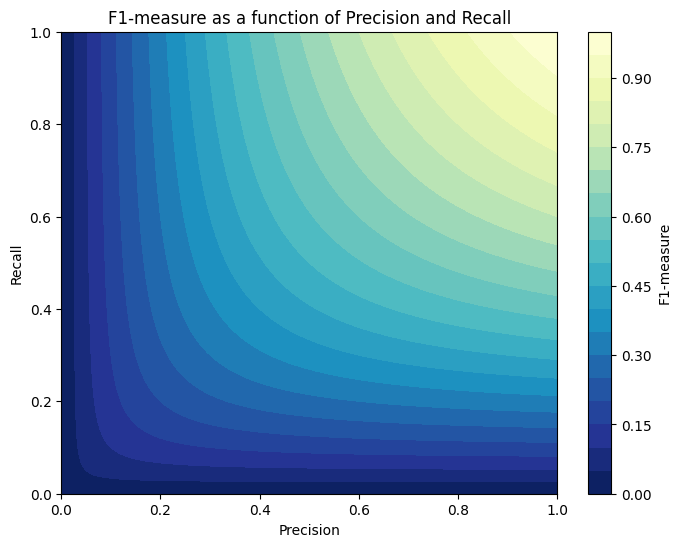

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем сетку значений для точности и полноты
precision = np.linspace(0, 1, 100)
recall = np.linspace(0, 1, 100)
P, R = np.meshgrid(precision, recall)

# Вычисляем F1-меру для каждой пары (точность, полнота)
F1 = 2 * (P * R) / (P + R)
F1[np.isnan(F1)] = 0  # Устанавливаем F1 = 0, когда P + R = 0

# Создаем график
plt.figure(figsize=(8, 6))
contour = plt.contourf(P, R, F1, levels=20, cmap='YlGnBu_r')  # Используем цветовую схему от синего к жёлтому

# Добавляем цветную шкалу
cbar = plt.colorbar(contour)
cbar.set_label('F1-measure')

# Настраиваем оси
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('F1-measure as a function of Precision and Recall')

# Отображаем график
plt.show()

In [79]:
from sklearn.metrics import f1_score

f1_score = f1_score(target_valid, best_prediction_dt)
print(f1_score)

0.011764705882352941


Precision is 1.0 and recall is close to 0. F-1 is summarizing the total result